# Machine Learning Examples
#### See Machine Learning Notes Notebook for More Info

## scikit-learn and the iris data
- Supervised Learning
- Classification

In [1]:
# import packages
from sklearn import datasets
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# RandomizedSearchCV works just like GridSearchCV with syntax
# it uses less memory because it doesn't evaluate every single combination of hyperparameters


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# set default plotting
plt.style.use('ggplot')

## General Notes
- split data to separate the labels and the data
```python
# splitting data to remove the target variables and convert to numpy array
x = df.drop('Target_variable', axis=1).values
y = df.Target_variable.values
```

### Preprocessing Data for scikit-learn

#### Categorical Data
- for categorical data with n different options, create n new columns and use binary data 0/1 to denote which category an observation has
    - it is possible to eliminate one of the categories, since if an observation is 0 for all of the other categories, then it will be the missing one
        - if you don't do this, you are duplicating some information, which might be an issue for some models
- how to do this
    - can do this manually using `.map()`
    - use sklearn `OneHotEncoder()`
    - use pandas `get_dummies(drop_first=True)`

In [172]:
# example of transforming the data this way
df = pd.DataFrame({'Sex': ['M', 'F', 'F', 'M', 'M', 'F', 'F'], 
                   'Color': ['blue', 'red', 'yellow', 'blue', 'yellow', 'blue', 'blue'],
                   'Age': [1, 2, 3, 4, 5, 6, 7]})
df

,Sex,Color,Age
0,M,blue,1
1,F,red,2
2,F,yellow,3
3,M,blue,4
4,M,yellow,5
5,F,blue,6
6,F,blue,7


In [176]:
df_dum = pd.get_dummies(df, drop_first=True)
df_dum

,Age,Sex_M,Color_red,Color_yellow
0,1,1,0,0
1,2,0,1,0
2,3,0,0,1
3,4,1,0,0
4,5,1,0,1
5,6,0,0,0
6,7,0,0,0


#### Missing Values
- can drop the rows entirely
- usually not preferred to drop a column (feature) entirely
- if too much data would be lost, can impute (make an educated guess) for missing values
    - ex. use the mean of all non-missing entries and fill the missing values using sklearn imputer

In [212]:
df = pd.DataFrame({'values': [0, 1, 2, 1, np.nan, 1, 2, 0, np.nan]})
df

,values
0,0.0
1,1.0
2,2.0
3,1.0
4,NaN
5,1.0
6,2.0
7,0.0
8,NaN


In [218]:
# using SimpleImputer, axis=0 means to calculate the mean of the column
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
x = df['values'].values
x = x.reshape(-1, 1)
imp.fit(x)
x = imp.transform(x)

In [219]:
x

array([[0.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [2.],
       [0.],
       [1.]])

Imputing with a pipeline
```python
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
logreg = linear_model.LogisticRegression()
steps = [('imputation', imp), ('logistic_regression', logreg)]
pipeline = Pipeline(steps)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)
pipeline.score(x_test, y_test)
```

#### Centering and Scaling Data (Normalizing)
- Standardization: subtract by mean and divide by variance
- Other methods as well
- sklearn's StandardScaler object will standardize
- can add to a pipeline

```python
from sklearn.preprocessing import StandardScaler
x_scaled = StandardScaler(x)


# in a pipeline for k-nn classifiers
steps = [('scaler': StandardScaler()),
         ('knn': KNeighborsClassifer())]
pipeline = Pipeline(steps)


# cross validation and scaling in a pipeline with k-nn
steps = [('scaler': StandardScaler()),
         ('knn': KNeighborsClassifer())]
pipeline = Pipeline(steps)

# value of the knn__n_neighbors var is a list or array of values to try (for k here)
parameters = {knn__n_neighbors=np.arange(1, 50)}

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

cv = GridSearchCV(pipeline, param_grid=parameters)
cv.fit(x_train, y_train)
y_pred = cv.predict(x_test)

# print params
print(cv.best_params_)
# print accuracy
print(cv.score(x_test, y_test))
#print classification report
print(classification_report(y_test, y_pred))
```



### Iris EDA

In [2]:
type(datasets)

module

In [140]:
# load the data
# uses the load_iris() method of the datasets module
# returns a sklearn 'Bunch'
iris = datasets.load_iris()

In [4]:
type(iris)

sklearn.utils.Bunch

Bunch datatype from sklearn is similar to a dictionary and contains key/value pairs

In [5]:
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


This shows what is in the Bunch object
- data
- target: target data
- target_names
- DESCR: description
- feature_names

In [6]:
# both datasets are numpy arrays
print(type(iris.data), type(iris.target))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [7]:
# 150 rows (samples) and 4 columns (features)
iris.data.shape

(150, 4)

Note: in the target data, 0 = setosa, 1 = versicolor, 2 = virginica

In [8]:
# index values from this array are the values in the target data
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
# assign data to variables
x = iris.data
y = iris.target
df = pd.DataFrame(x, columns=iris.feature_names)

In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


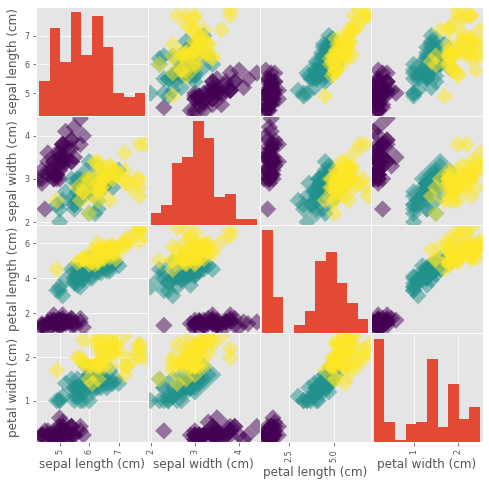

In [11]:
# visualize the data
_ = pd.plotting.scatter_matrix(df, c=y, figsize=[8,8], s=150, marker='D')

#### Iris k-NN Using sklearn

Use the k-NN algorithm on the iris dataset
- good basic algorithm for this problem
    - classification of labeled data

In [12]:
# create an instance of a k neighbors classifier
knn = KNeighborsClassifier(n_neighbors=7)

In [13]:
# train the data using the labeled dataset
# two arguments, features as numpy array, and the labels as an array
# array of labels must be 1d, the same length as the number of observations in the features array
# features must be continuous values for this method
# must be no missing values
knn.fit(iris['data'], iris['target'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [14]:
# generate some data for prediction
new_data = np.array([[5.0, 3.4, 1.5, 0.2], [7.8, 3.1 , 6.2, 2.4], [7., 3.1, 5.5, 2.2]])

In [15]:
# make predictions on unlabeled data
# new_array should have the same number of features in the same order as the training array
prediction = knn.predict(new_data)

In [16]:
# print the predictions
print('Prediction {}'.format(prediction))

Prediction [0 2 2]


In [17]:
# print the results as species names
[iris.target_names[prediction[i]] for i in range(len(prediction))]

['setosa', 'virginica', 'virginica']

This was run once on all of the training data
- There was no cross validation for the number of k to use
- There was no test data to evaluate the model

#### Measuring Model Performance
- accuracy = # correct predictions / total number of data points
- should use unseen data not used to train to test this
    - for production models divide the data into 60% train, 20% validation, 20% test
    - another option is cross validation, dividing the training data into folds, reiterating the model construction and k optimization each time (like below) and taking the average of the accuracy each time to choose the best k

This example only divides into train/test
- But this would be similar to the 4/5 fold test for cross validation as well

In [142]:
# use the sklearn test_train_split function to randomly split the data
# iris.data contains the feature measurements, iris.target contains the labels (y values)
# test_size specifies the proportion of the data to save for the test set, default is 25% test/75% train
# random_state just sets the seed for the random number generator
# stratify = y ensures that our labels are represented in train/test sets in the same proportion as the source data
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, 
                                                    random_state=21, stratify=iris.target)

In [19]:
# set the number of neighbors and create classifier instance
# train the model
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [20]:
# make the preditions on the test data
y_pred = knn.predict(x_test)

In [21]:
print(y_pred)

[2 1 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]


In [22]:
# evaluate the model using the test features and the test labels
# do not supply the actual values from the .predict() method
knn.score(x_test, y_test)

0.9555555555555556

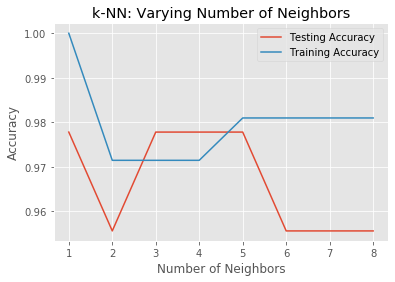

In [23]:
# Setup arrays to store train and test accuracies
# view the plot to help pick the best k to use
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(x_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(x_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

Best k value is between 3-5

#### Hyperparameter Tuning for k Using GridSearchCV

- with multiple hyperparameters, this method will try all combinations of the hyperparameters (what you want)

In [143]:
# split the data
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, 
                                                    random_state=21, stratify=iris.target)

In [144]:
# specify the grid of values to test
# multiple hyperparameters would each receive a key in the dictionary with its related range
param_grid = {'n_neighbors': np.arange(1, 50)}

knn = KNeighborsClassifier()

knn_cv = GridSearchCV(knn, param_grid, cv=5)

knn_cv.fit(x_train, y_train)

# print the best value(s) for each hyperparameter and the mean of the best validation score
print(knn_cv.best_params_, knn_cv.best_score_)

{'n_neighbors': 3} 0.9714285714285715


#### Evaluating Model Performance with a Confusion Matrix

In [102]:
# assign data to variables
x = iris.data
y = iris.target
df = pd.DataFrame(x, columns=iris.feature_names)

In [105]:
# fit and train the model and predict on the test set

knn = KNeighborsClassifier(n_neighbors=5)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

In [106]:
# print the confusion matrix
# labels are 0, 1, 2
# predictions are columns
# observations are rows
# all correct, except that 1 was predicted as 1 that was actually a 2
print(confusion_matrix(y_test, y_pred))

[[23  0  0]
 [ 0 19  0]
 [ 0  1 17]]


In [108]:
# print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.95      1.00      0.97        19
           2       1.00      0.94      0.97        18

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



#### Logistic Regression for Classification

- Classifying binary decisions
    - 0 or 1
- Default threshold is 0.5
    - 0.5 or higher probability is classified as 1, while less is 0
- ROC curve (receiver operating characteristic)
    - trying all possible options for the threshold between 0-1
    - alters the number of true positives (y) plotted against false positives (x)
- AUC (area under the ROC curve)
    - if true positive = 1 and false positive = 0, that is the max area under the curve
    - the larger area under the curve, the better the model

In [111]:
# Pima Indians diabetes data
diabetes = pd.read_csv('diabetes.csv')

In [112]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [133]:
# divide the data into features and target
# to simplify, only using one feature
x = diabetes.BMI.values
y = diabetes.Outcome.values
names = diabetes.drop('Outcome', axis=1).columns

x = x.reshape(-1,1)

In [134]:
# build, fit, and predict using the model

logreg = linear_model.LogisticRegression()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

# compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[173  33]
 [ 78  24]]
              precision    recall  f1-score   support

           0       0.69      0.84      0.76       206
           1       0.42      0.24      0.30       102

    accuracy                           0.64       308
   macro avg       0.56      0.54      0.53       308
weighted avg       0.60      0.64      0.61       308



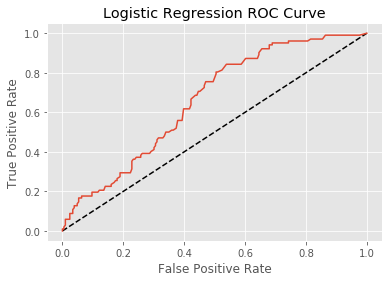

In [135]:
# plot ROC curve

# build the predicted probabilities
# returns an array with two columns: each column contains probabilities for the target values
# we are selecting the probability of being a 1
y_pred_prob = logreg.predict_proba(x_test)[:,1]

# unpack into false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

_ = plt.plot([0,1], [0,1], 'k--')
_ = plt.plot(fpr, tpr, label='Logistic Regression')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('Logistic Regression ROC Curve')

In [136]:
# compute the AUC directly
print(roc_auc_score(y_test, y_pred_prob))

0.6582191128878737


In [137]:
# computing the AUC using cross validatoin
cv_scores = cross_val_score(logreg, x, y, cv=5, scoring='roc_auc')
print(cv_scores)
print(np.mean(cv_scores))

[0.6987963  0.67472222 0.68935185 0.74735849 0.63490566]
0.6890269042627533


#### Hyperparameter Tuning Using GridSearchCV

- Logistic regression uses a hyperparameter C
    - C controls the inverse of the regularization strength
        - large C will overfit, while too small C will underfit

In [209]:
diabetes.Insulin.replace(0, np.nan, inplace=True)
diabetes.SkinThickness.replace(0, np.nan, inplace=True)
diabetes.BMI.replace(0, np.nan, inplace=True)
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               541 non-null float64
Insulin                     394 non-null float64
BMI                         757 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


In [233]:
# using SimpleImputer, axis=0 means to calculate the mean of the column
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
x = diabetes.BMI.values
x = x.reshape(-1, 1)
imp.fit(x)
x = imp.transform(x)

In [234]:
# split the data
# divide the data into features and target
# to simplify, only using one feature
y = diabetes.Outcome.values
names = diabetes.drop('Outcome', axis=1).columns

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

In [235]:
# setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}


# create an instance of the model
logreg = linear_model.LogisticRegression(solver='liblinear')

# create an instance of the gridsearch object
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# fit the data
logreg_cv.fit(x_train, y_train)

# print the results
print(logreg_cv.best_params_, logreg_cv.best_score_)

{'C': 0.4393970560760795, 'penalty': 'l2'} 0.673913043478261


In [236]:
logreg_test = linear_model.LogisticRegression(solver='liblinear', C=0.439, penalty='l2')

logreg_test.fit(x_train, y_train)

y_pred = logreg_test.predict(x_test)

# compute and print the confusion matrix and classification report
print(logreg_test.score(x_test, y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.6655844155844156
[[187  19]
 [ 84  18]]
              precision    recall  f1-score   support

           0       0.69      0.91      0.78       206
           1       0.49      0.18      0.26       102

    accuracy                           0.67       308
   macro avg       0.59      0.54      0.52       308
weighted avg       0.62      0.67      0.61       308



Imputing using a pipeline and running the model all at once

In [229]:
x = diabetes.BMI.values
x = x.reshape(-1, 1)
y = diabetes.Outcome.values

In [230]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
logreg = linear_model.LogisticRegression()
steps = [('imputation', imp), ('logistic_regression', logreg)]
pipeline = Pipeline(steps)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)
pipeline.score(x_test, y_test)

0.6396103896103896

## Regression Example

#### splitting data to remove the target variables and convert to numpy array
```python
# separate variables
x = df.drop('Target_variable', axis=1).values
y = df.Target_variable.values

# may need to reshape single columns
x_one_feature = x[:,5]
x_one_feature.reshape(-1, 1)
y.reshape(-1, 1)
```

In [28]:
# load the boston housing dataset
boston = datasets.load_boston()

In [3]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


This shows what is in the Bunch object
- data
- target: target data
- target_names
- DESCR: description
- feature_names

In [4]:
# both datasets are numpy arrays
print(type(boston.data), type(boston.target))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [5]:
# 506 rows (samples) and 13 columns (features)
boston.data.shape, boston.target.shape

((506, 13), (506,))

In [6]:
# these are the median prices we are trying to predict
boston.target[0:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [25]:
# assign data to variables
x = boston.data
y = boston.target
df = pd.DataFrame(x, columns=boston.feature_names)

In [8]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
# select only one feature for testing purposes
x_rooms = df.RM.values

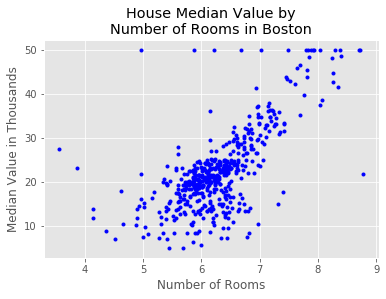

In [10]:
_ = plt.plot(x_rooms, y, marker='.', linestyle='None', color='blue')
_ = plt.xlabel('Number of Rooms')
_ = plt.ylabel('Median Value in Thousands')
_ = plt.title('House Median Value by\nNumber of Rooms in Boston')

In [11]:
# fit the regression model

# create an instance of LinearRegression object
reg = linear_model.LinearRegression()

# need to reshape the data to supply a 2d array
# use .reshape(-1, 1) if working with a 1d array
# changes from a simple array of numbers, to a column of numbers
x_rooms = x_rooms.reshape(-1, 1)
y = y.reshape(-1, 1)

# fit the model
reg.fit(x_rooms, y)

# create the prediction space between the min and max x values
prediction_space = np.linspace(min(x_rooms), max(x_rooms)).reshape(-1, 1)

In [12]:
# display the R^2 value
print('R-squared:', reg.score(x_rooms, y))

R-squared: 0.4835254559913343


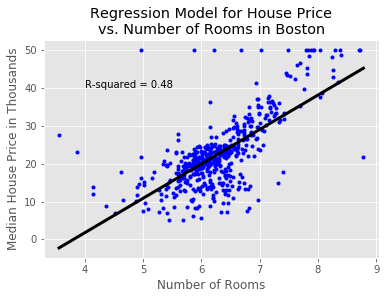

In [13]:
# plot the resulting regression model over the scatter plot

r2 = 'R-squared = ' + str(round(reg.score(x_rooms, y),2))

_ = plt.plot(x_rooms, y, marker='.', linestyle='None', color='blue')
_ = plt.plot(prediction_space, reg.predict(prediction_space), color='black', linewidth=3)
_ = plt.xlabel('Number of Rooms')
_ = plt.ylabel('Median House Price in Thousands')
_ = plt.title('Regression Model for House Price\nvs. Number of Rooms in Boston')
_ = plt.text(4, 40, r2)

In [15]:
# display the model parameters
print('coefficient: ', reg.coef_, 'intercept: ', reg.intercept_)

coefficient:  [[9.10210898]] intercept:  [-34.67062078]


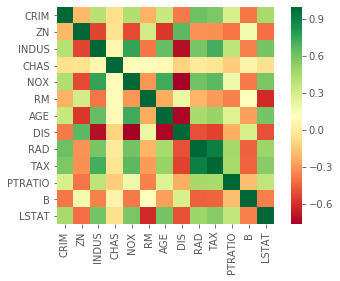

In [82]:
# view a heatmap to check for other variables that might explain some additional variation in y
# df.corr() computes pairwise correlations between the columns
# green means + correlation and red mean - correlation
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

This time, using all of the features from the Boston housing data
- normally, you would 'regularize' the data first, rather than just plug and play like this
    - regularization penalizes large coefficients for features
    - helps prevent overfitting
- example of this below

In [21]:
# divide the data into train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# instantiate the regression object
reg_all = linear_model.LinearRegression()

# fit the model
reg_all.fit(x_train, y_train)

# assess the model
y_pred = reg_all.predict(x_test)

# compute r-squared for accuracy measure
rsquared = reg_all.score(x_test, y_test)

In [22]:
print(rsquared)

0.711226005748496


In [23]:
# view model params
# model params with coef exp of +1 or +00 have the largest effect
print(reg_all.coef_, reg_all.intercept_)

[[-1.33470103e-01  3.58089136e-02  4.95226452e-02  3.11983512e+00
  -1.54170609e+01  4.05719923e+00 -1.08208352e-02 -1.38599824e+00
   2.42727340e-01 -8.70223437e-03 -9.10685208e-01  1.17941159e-02
  -5.47113313e-01]] [31.63108404]


In [31]:
pd.DataFrame({'features': np.array(boston.feature_names), 'estimatedCoefficients': reg_all.coef_[0]})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.133470
1,ZN,0.035809
2,INDUS,0.049523
3,CHAS,3.119835
4,NOX,-15.417061
5,RM,4.057199
6,AGE,-0.010821
7,DIS,-1.385998
8,RAD,0.242727
9,TAX,-0.008702


#### Cross Validation for Linear Regression Using scikit-learn
- Boston housing dataset

In [88]:
# assign data to variables

# features
x = boston.data

# target
y = boston.target

# instantiate the model
reg = linear_model.LinearRegression()

# do the cross validation with cv=5 for 5-fold validation
# returns an array of cross validation scores of length 'cv'
# r-squared is reported as this is the default for linear regression
cv_results = cross_val_score(reg, x, y, cv=5)

print(cv_results)
print(np.mean(cv_results))

[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]
0.35327592439588124


#### Linear Regression with Regularization

- Ridge Regression
    - loss function is OLS + the sum of the squared features coefficients times a hyperparameter (alpha or lambda depending on who you ask)
    - must choose an alpha, similar to how k is chosen for k-NN
    - 0 for alpha/lambda returns OLS and can lead to overfitting, and very high alpha overpenalizes leading to an extremely simple model that underfits

In [90]:
# divide the data into train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# choose alpha value
# normalize=True ensures variables are on the same scale (divide by variances?)
ridge = linear_model.Ridge(alpha=0.1, normalize=True)
ridge.fit(x_train, y_train)
ridge_pred = ridge.predict(x_test)
print(ridge.score(x_test, y_test))

0.6996938275127313


Ridge Regression to Select alpha from DataCamp

In [100]:
# ridge regression to select alpha

def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

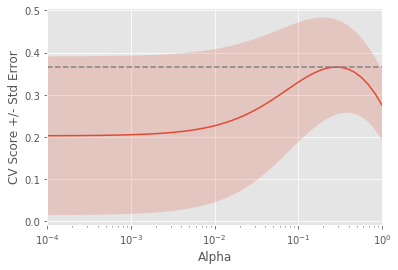

In [101]:
# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = linear_model.Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, x, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

Hyperparameter tuning to get alpha using GridSearchCV
- Not sure if the first instance of ridge should use normalize=True or not

In [152]:
# divide the data into train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# specify the grid of values to test
# multiple hyperparameters would each receive a key in the dictionary with its related range
param_grid = {'alpha': np.arange(0, 1, 0.01)}

ridge = linear_model.Ridge()

ridge_cv = GridSearchCV(ridge, param_grid, cv=5)

ridge_cv.fit(x_train, y_train)

# print the best value(s) for each hyperparameter and the mean of the best validation score
print(ridge_cv.best_params_, ridge_cv.best_score_)

{'alpha': 0.99} 0.09375109903062602


In [153]:
# choose alpha value
# normalize=True ensures variables are on the same scale (divide by variances?)
ridge = linear_model.Ridge(alpha=0.99, normalize=True)
ridge.fit(x_train, y_train)
ridge_pred = ridge.predict(x_test)
print(ridge.score(x_test, y_test))

0.04998143209044992


- Lasso Regression
    - loss function is OLS + sum of the absolute values of the feature coefficients times the hyperparameter alpha/lambda
    - less overall penalty for large feature coefficients
    - **helps with features selection**
        - tends to shrink coefficients of less important features to exactly 0 (dimension reduction)

In [91]:
# divide the data into train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# choose alpha value
# normalize=True ensures variables are on the same scale (divide by variances?)
lasso = linear_model.Lasso(alpha=0.1, normalize=True)
lasso.fit(x_train, y_train)
lasso_pred = lasso.predict(x_test)
print(lasso.score(x_test, y_test))

0.595022953532855


- Feature Selection with Lasso Regression
    - be sure to include normalize=True
- Choose only features with coefficients that are not 0

[-0.          0.         -0.          0.         -0.          2.95469455
 -0.          0.         -0.         -0.         -0.24795837  0.
 -0.42817439]


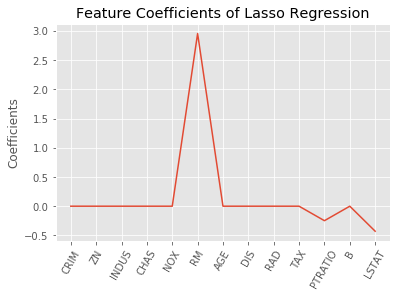

In [99]:
# assign data to variables
x = boston.data
y = boston.target
df = pd.DataFrame(x, columns=boston.feature_names)

# extract feature names omitting the target
names = df.columns

lasso = linear_model.Lasso(alpha=0.1, normalize=True)

# extract the .coef_ attribute from the model
lasso_coef = lasso.fit(x, y).coef_

print(lasso_coef)

_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('Coefficients')
_ = plt.title('Feature Coefficients of Lasso Regression')